<a href="https://colab.research.google.com/github/egyptai/KNN/blob/main/Iristest20210603.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
iris = load_iris()

In [9]:
'''
print(iris.keys())
print(iris['data'])
print(iris['target'])
print(iris['DESCR'])
print(iris['target_names'])
print(iris['feature_names'])
print(iris['data'].shape)
'''

"\nprint(iris.keys())\nprint(iris['data'])\nprint(iris['target'])\nprint(iris['DESCR'])\nprint(iris['target_names'])\nprint(iris['feature_names'])\nprint(iris['data'].shape)\n"

In [7]:
trainX, testX, trainY, testY = \
  train_test_split(iris['data'], iris['target'], test_size = 0.2)

In [11]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')
knn.fit(trainX, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
predY = knn.predict(testX)
accuracy = (testY == predY).mean()
print()
print("* 시험용 데이터로 측정한 정확도 = %.2f" % accuracy)


* 시험용 데이터로 측정한 정확도 = 1.00


In [14]:
predY = knn.predict(trainX)
accuracy = (trainY == predY).mean()
print("* 학습용 데이터로 측정환 정확도 = %.2f" % accuracy)

* 학습용 데이터로 측정환 정확도 = 0.96


In [16]:
testAcc= []
trainAcc = []
for k in range(1, 50):
  knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
  knn.fit(trainX, trainY)

  predY = knn.predict(testX)
  testAcc.append((testY == predY).sum() / len(predY))

  predY = knn.predict(trainX)
  trainAcc.append((trainY == predY).sum() / len(predY))

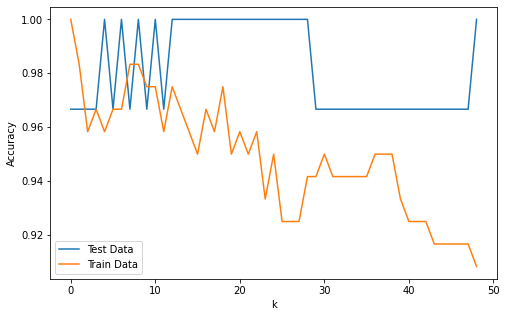

In [18]:
plt.figure(figsize = (8, 5))
plt.plot(testAcc, label = "Test Data")
plt.plot(trainAcc, label = "Train Data")
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()